In [3]:
#AUM
import numpy as np
import pandas as pd

It can be more flexible to predict probabilities of an observation belonging to each class in a classification problem rather than predicting classes directly.

This flexibility comes from the way that probabilities may be interpreted using different thresholds that allow the operator of the model to trade-off concerns in the errors made by the model, such as the number of false positives compared to the number of false negatives. This is required when using models where the cost of one error outweighs the cost of other types of errors.

Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems are ROC Curves and Precision-Recall curves.

- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

- Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

- ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

## Predicting probability

In a classification problem, we may decide to predict the class values directly.

Alternately, it can be more flexible to predict the probabilities for each class instead. The reason for this is to provide the capability to choose and even calibrate the threshold for how to interpret the predicted probabilities.

For example, a default might be to use a threshold of 0.5, meaning that a probability in [0.0, 0.49] is a negative outcome (0) and a probability in [0.5, 1.0] is a positive outcome (1).

This threshold can be adjusted to tune the behavior of the model for a specific problem. An example would be to reduce more of one or another type of error.

When making a prediction for a binary or two-class classification problem, there are two types of errors that we could make.

- False Positive. Predict an event when there was no event.
- False Negative. Predict no event when in fact there was an event.

By predicting probabilities and calibrating a threshold, a balance of these two concerns can be chosen by the operator of the model.

For example, in a smog prediction system, we may be far more concerned with having low false negatives than low false positives. A false negative would mean not warning about a smog day when in fact it is a high smog day, leading to health issues in the public that are unable to take precautions. A false positive means the public would take precautionary measures when they didn’t need to.

A common way to compare models that predict probabilities for two-class problems is to use a ROC curve.

## What are ROC Curve
A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.

True Positive Rate = True Positives / (True Positives + False Negatives)
True positive rate is also referred to as sensitiity

The false positive rate is calculated as the number of false positives divided by the sum of the number of false positives and the number of true negatives.

It is also called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.

False Positive Rate = False Positives / (False Positives + True Negatives)

The false positive rate is also referred to as the inverted specificity where specificity is the total number of true negatives divided by the sum of the number of true negatives and false positives.

Specificity = True Negatives / (True Negatives + False Positives)

False Positive Rate = 1 - Specificity

The ROC curve is a useful tool for a few reasons:

- The curves of different models can be compared directly in general or for different thresholds.
- The area under the curve (AUC) can be used as a summary of the model skill.

The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

To make this clear:

- values on the x-axis of the plot indicate lower false positives and higher true negatives.
- Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

If you are confused, remember, when we predict a binary outcome, it is either a correct prediction (true positive) or not (false positive). There is a tension between these options, the same with true negative and false negative.

A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. This is what we mean when we say that the model has skill. Generally, skilful models are represented by curves that bow up to the top left of the plot.

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.

### ROC UC example

We can plot a ROC curve for a model in Python using the *roc_curve()* scikit-learn function.

The function takes both the true outcomes (y_test) from the test set and the **predicted probabilities for the 1 class.**

The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.

The AUC for the ROC can be calculated using the *roc_auc_score()* function.
Like the *roc_curve()* function, the AUC function takes both the true outcomes (0,1) from the test set(y_test) and the **predicted probabilities for the 1 class.**

It returns the AUC score between 0.0 and 1.0 for no skill and perfect skill respectively.




### ROC AUC for logistic regression

No skill: ROC AUC = 0.500
Logistic: ROC AUC = 0.903


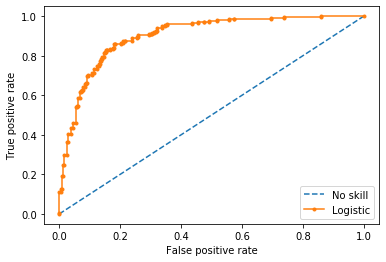

In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2)

# Generating no skill model
ns_prob = [0 for _ in range(len(y_test))]

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
lr_prob = lr.predict_proba(X_test)

# keeping probability of positive class only
lr_prob = lr_prob[:, 1]

# calculating ROC AUC score for both trained and noskill model
ns_auc = roc_auc_score(y_test, ns_prob) # for no skill model
lr_auc = roc_auc_score(y_test, lr_prob)

# summarizing scores
print('No skill: ROC AUC = {:.3f}'.format(ns_auc))
print('Logistic: ROC AUC = {:.3f}'.format(lr_auc))

# Calculating roc curves
ns_fpr, ns_tpr, threshold = roc_curve(y_test, ns_prob)
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_prob)

# ploting ROC curve for both model
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label = 'Logistic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

## Precision-Recall Curves
**More on precision and recall**

https://en.wikipedia.org/wiki/Precision_and_recall

#### Precision
Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. **It describes how good a model is at predicting the positive class.**
- Precision is referred to as the positive predictive value.

precision(Positive Predictive Power) = True Positives / (True Positives + False Positives)

#### Recall
Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

Sensitivity = True Positives / (True Positives + False Negatives)


Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).

The reason for this is that typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly, e.g. high true negatives.

Key to the calculation of precision and recall is that the calculations do not make use of the true negatives. It is only concerned with the correct prediction of the minority class, class 1.

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.

'''While the baseline is fixed with ROC, the baseline of [precision-recall curve] is determined by the ratio of positives (P) and negatives (N) as y = P / (P + N). For instance, we have y = 0.5 for a balanced class distribution …'''

— The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets, 2015.

A model with perfect skill is depicted as a point at (1,1). A skilful model is represented by a curve that bows towards (1,1) above the flat line of no skill.

There are also composite scores that attempt to summarize the precision and recall; two examples include:

- F-Measure or F1 score: that calculates the harmonic mean of the precision and recall (harmonic mean because the precision and recall are rates).

- Area Under Curve: like the AUC, summarizes the integral or an approximation of the area under the precision-recall curve.

In terms of model selection, **F-Measure summarizes model skill for a specific probability threshold (e.g. 0.5), whereas the area under curve summarize the skill of a model across thresholds, like ROC AUC.**

This makes precision-recall and a plot of precision vs. recall and summary measures useful tools for binary classification problems that have an imbalance in the observations for each class.

The precision and recall can be calculated for thresholds using the *precision_recall_curve()* function that takes the **true output values and the probabilities for the positive class as input** and returns the precision, recall and threshold values.

The F-Measure can be calculated by calling the *f1_score()* function that takes the true class values and the predicted class values as arguments.

The area under the precision-recall curve can be approximated by calling the *auc()* function and passing it the recall (x) and precision (y) values calculated for each threshold.

When plotting precision and recall for each threshold as a curve, it is important that recall is provided as the x-axis and precision is provided as the y-axis.

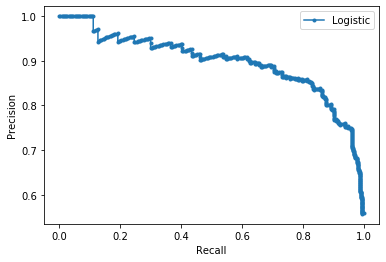

Logistic: f1 = 0.841, auc = 0.898


In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# using same train and test data as used above
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)
lr_prob = lr.predict_proba(X_test)
lr_prob = lr_prob[:,1]
y_pred = lr.predict(X_test)
lr_precision, lr_recall, lr_threshold = precision_recall_curve(y_test, lr_prob)
lr_f1 = f1_score(y_test, y_pred)
lr_auc = auc(lr_recall, lr_precision)
# Summarize score 

plt.plot(lr_recall, lr_precision, marker = '.', label = 'Logistic')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
print('Logistic: f1 = {:.3f}, auc = {:.3f}'.format(lr_f1, lr_auc))

# When to Use ROC vs. Precision-Recall Curves?

- ROC curves should be used when there are roughly equal numbers of observations for each class.

- Precision-Recall curves should be used when there is a moderate to large class imbalance.

However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. […] Precision-Recall (PR) curves, often used in Information Retrieval , have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution.

Some go further and suggest that using a ROC curve with an imbalanced dataset might be deceptive and lead to incorrect interpretations of the model skill.

The main reason for this optimistic picture is because of the use of true negatives in the False Positive Rate in the ROC Curve and the careful avoidance of this rate in the Precision-Recall curve.

To support above argument lets creat an example with high imbalanced data(100:1)

985 instances - class 0
015 instances - class 1

We will calculate both metric ROC AUC and f1 score on this dataset and compare the metric performance 

No skill AUC = 0.500
Logistic AUC = 0.716


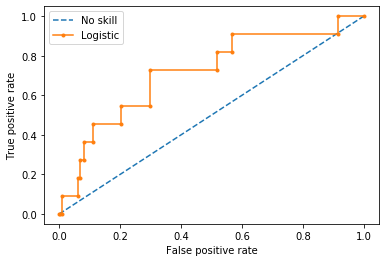

In [12]:
X, y = make_classification(n_samples=1000, n_classes=2,
                          weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                   random_state = 2)
# creating noskill model 
ns_prob = [0 for _ in range(len(y_test))]
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)
lr_prob = lr.predict_proba(X_test)
lr_prob = lr_prob[:,1]
# calculating ROC AUC score
fpr_ns, tpr_ns, threshold_ns = roc_curve(y_test, ns_prob)
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, lr_prob)
auc_ns = roc_auc_score(y_test, ns_prob)
auc_lr = roc_auc_score(y_test, lr_prob)
# summerizing score
print('No skill AUC = {:.3f}'.format(auc_ns))
print('Logistic AUC = {:.3f}'.format(auc_lr))

# ploting ROC
plt.plot(fpr_ns, tpr_ns, label = 'No skill', linestyle = '--')
plt.plot(fpr_lr, tpr_lr, marker = '.', label = 'Logistic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic: f1=0.000 auc=0.054


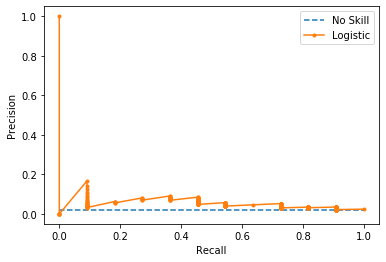

In [19]:
# Now evaluating same model with precision recall curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()